## Preprocesamiento de los Datos
### Dataset de texto (tabular)

In [1]:
import pandas as pd
import numpy as np

# Cargar dataset
df = pd.read_csv("veterinary_clinical_dataset.csv")
print("Dimensiones iniciales:", df.shape)
df.head()

Dimensiones iniciales: (10000, 10)


,AnimalName,Breed,Age,Weight_kg,MedicalHistory,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
0,Dog,Rottweiler,6.0,32.1,Chronic illness,Anorexia,Hydrophobia,drooping ears,Diarrhea,Shyness or aggression
1,Dog,Bulldog,9.9,18.5,Vaccinated,Lethargy,Weakness,Horny growth,Fever,Coughing
2,Dog,Beagle,13.9,18.9,Parasite history,Pain,Weight loss,Weight loss,Sneezing,Drop on egg production
3,cat,Scottish Fold,5.8,6.3,Recent surgery,Vomiting,Pain,Edema in lower jaw,Pain,Weakness
4,cat,Persian,11.2,4.9,Recent surgery,Severe,Weight loss,Egg production stops,Weakness,Poor Body condition


### Eliminación de duplicados

In [2]:
print("Duplicados antes:", df.duplicated().sum())
df = df.drop_duplicates()
print("Dimensiones después de eliminar duplicados:", df.shape)

Duplicados antes: 20
Dimensiones después de eliminar duplicados: (9980, 10)


### Normalización de texto en columnas categóricas
- Convertimos todo a minúsculas y eliminamos espacios extras.

In [3]:
# Normalizar texto en todas las columnas categóricas
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

df[categorical_cols].nunique()

AnimalName          2
Breed              18
MedicalHistory     11
Symptom_1         772
Symptom_2         773
Symptom_3         788
Symptom_4         779
Symptom_5         768
dtype: int64

### Validación de rangos y outliers en variables numéricas

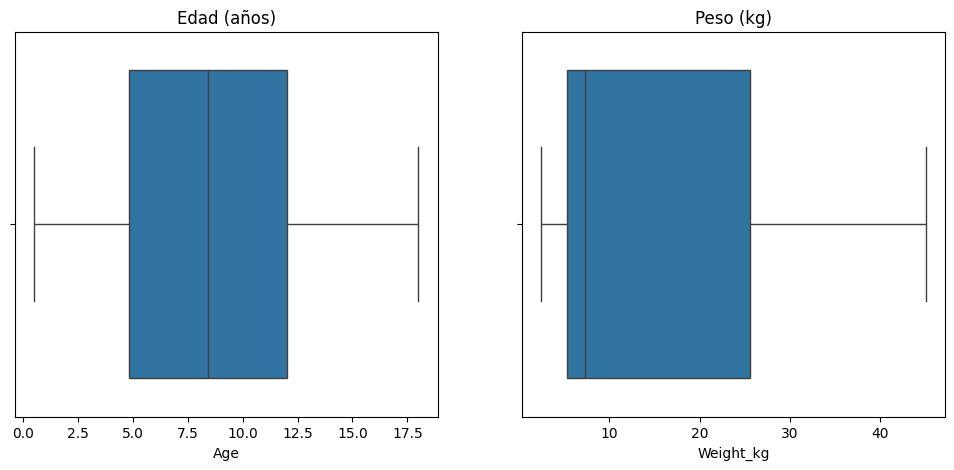

               Age    Weight_kg
count  9980.000000  9980.000000
mean      8.437555    14.904699
std       4.636439    12.631109
min       0.500000     2.500000
25%       4.800000     5.300000
50%       8.400000     7.300000
75%      12.000000    25.600000
max      18.000000    45.000000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title('Edad (años)')

sns.boxplot(x=df['Weight_kg'], ax=axes[1])
axes[1].set_title('Peso (kg)')
plt.show()

print(df[['Age','Weight_kg']].describe())

### Análisis exploratorio de síntomas
Verificamos la frecuencia de aparición de síntomas para entender la distribución clínica.

In [5]:
# Unificar todos los síntomas en una sola serie para análisis
symptoms = pd.concat([df['Symptom_1'], df['Symptom_2'], df['Symptom_3'], 
                      df['Symptom_4'], df['Symptom_5']])
symptoms = symptoms.str.strip().str.lower()
print("Cantidad de síntomas únicos:", symptoms.nunique())
print("Top 20 síntomas más frecuentes:")
print(symptoms.value_counts().head(20))

Cantidad de síntomas únicos: 869
Top 20 síntomas más frecuentes:
fever                      3605
weight loss                3140
diarrhea                   3030
coughing                   2712
pain                       2698
vomiting                   2626
lethargy                   2601
weakness                   2581
anorexia                   2440
sneezing                   2431
loss of appetite            571
pains                       534
depression                  478
death                       400
nasal discharge             348
lameness                    258
swelling                    216
difficulty in breathing     197
dehydration                 176
wasting                     162
Name: count, dtype: int64


### Guardado de dataset limpio
Exportamos los datos preprocesados para usar en las siguientes fases del proyecto (feature engineering y modelado).


In [6]:
df.to_csv("veterinary_clinical_dataset_clean.csv", index=False)
print("Archivo guardado: veterinary_clinical_dataset_clean.csv")

Archivo guardado: veterinary_clinical_dataset_clean.csv
